<a href="https://colab.research.google.com/github/poojak-shetty/Capstone-1/blob/master/Multivariate_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now let's use multivariate polynomial regression and find out the RMSE value.

## IMPORTING AND LOADING DATA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns

In [0]:
df = pd.read_csv('Train set.csv')
dff=pd.read_csv('Test set.csv')

In [0]:
df.head()

,Unnamed: 0,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]
dff=dff.loc[:, ~dff.columns.str.match('Unnamed')]

In [0]:
df.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
df.corr('pearson')['Life expectancy '].sort_values()

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556457
Developing                        -0.481962
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
under-five deaths                 -0.222503
infant deaths                     -0.196535
Measles                           -0.157574
Population                        -0.019638
Year                               0.169623
Hepatitis B                        0.203771
Total expenditure                  0.207981
percentage expenditure             0.381791
Alcohol                            0.391598
GDP                                0.430493
Polio                              0.461574
Diphtheria                         0.475418
 BMI                               0.559255
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [0]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [0]:
df1=(df-df.min()) /(df.max()-df.min())

In [0]:
df1.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,1.0,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,1.0,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,1.0,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,1.0,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,1.0,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937


Till here all the steps are the same as in linear regression model

## MULTIVARIATE POLYNOMIAL REGRESSION (2 FEATURES)

HYPOTHESIS **FUNCTION**

In [0]:
def hypothesis(a,b,c,x1,x2):
    return (a * x1) + (b * np.power(x2, 2)) + c 

ERROR **FUNCTION**

In [0]:
def error1(a,b,c,x1,x2,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(hypothesis(a,b,c,x1[i], x2[i])-y[i], 2)
  
  return e/(2*m)    

**STEP GRADIENT FUNCTION**

In [0]:
def step_gradient1(a,b,c,x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  return a,b,c

In [0]:
def descend1(init_a,init_b,init_c,x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iterations):
    if i%100==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error1(a,b,c,x1,x2,y),a,b,c))
    a,b,c = step_gradient1(a,b,c,x1,x2,y,learning_rate)

  return a,b,c

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
#a,b,c = 0,0,0
learning_rate = 0.05
iterations = 1000

a, b, c = descend1(a, b, c,df1[' HIV/AIDS'].values,df1['Alcohol'].values, df1['Life expectancy '].values, learning_rate, iterations)

Error: 0.00997 | a: -0.62956 | b: 0.46971 | c: 0.59152
Error: 0.00993 | a: -0.64463 | b: 0.47060 | c: 0.59190
Error: 0.00989 | a: -0.65896 | b: 0.47130 | c: 0.59229
Error: 0.00985 | a: -0.67257 | b: 0.47182 | c: 0.59267
Error: 0.00982 | a: -0.68551 | b: 0.47220 | c: 0.59305
Error: 0.00979 | a: -0.69781 | b: 0.47246 | c: 0.59343
Error: 0.00976 | a: -0.70950 | b: 0.47262 | c: 0.59379
Error: 0.00974 | a: -0.72062 | b: 0.47270 | c: 0.59414
Error: 0.00972 | a: -0.73119 | b: 0.47271 | c: 0.59449
Error: 0.00969 | a: -0.74124 | b: 0.47267 | c: 0.59482


In [0]:
print("{0:.2f}%".format(np.sqrt(error1(a,b,c, df1[" HIV/AIDS"], df1['Alcohol'], df1["Life expectancy "]))*100))
#WITH FEATURES HIV/AIDS AND ALCOHOL

9.84%


In [0]:
print("{0:.2f}%".format(np.sqrt(error1(a,b,c, df1["Adult Mortality"], df1[' thinness  1-19 years'], df1["Life expectancy "]))*100))
#WITH FEATURES ADULT MORTALITY AND THINNESS 1-19 YEARS

8.95%


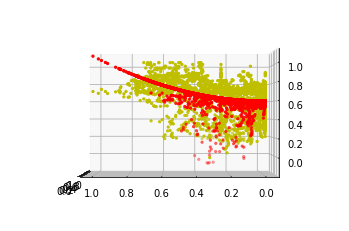

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0,180)

ax.scatter(df1[" HIV/AIDS"], df1["Alcohol"], df1["Life expectancy "], c='y', marker='.')
ax.scatter(df1[" HIV/AIDS"], df1["Alcohol"], hypothesis(a,b,c,df1[" HIV/AIDS"], df1["Alcohol"]), c='r', marker='.')

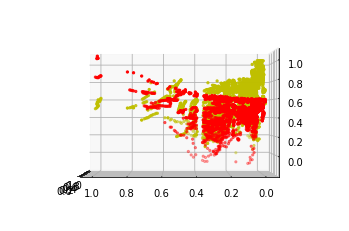

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0,180)

ax.scatter(df1["Adult Mortality"], df1[' thinness  1-19 years'], df1["Life expectancy "], c='y', marker='.')
ax.scatter(df1["Adult Mortality"], df1[' thinness  1-19 years'], hypothesis(a,b,c,df1["Adult Mortality"], df1[' thinness  1-19 years']), c='r', marker='.')

With 2 features we could only hit maximum 8.95% error.So,lets try with multivariate polynomial regression wrt 3 features

# MULTIVARIATE POLYNOMIAL REGRESSION(3 FEATURES)

HYPOTHESIS FUNCTION

In [0]:
def hypothesis(a,b,c,d,x1,x2,x3):
    return (a * x1) + (b * np.power(x2, 2)) + (c * np.power(x3,3)) + d 

ERROR FUNCTION

In [0]:
def error1(a,b,c,d,x1,x2,x3,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(hypothesis(a,b,c,d,x1[i], x2[i],x3[i])-y[i], 2)
  
  return e/(2*m)    

STEP GRADIENT FUNCTION

In [0]:
def step_gradient1(a,b,c,d, x1,x2,x3,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (hypothesis(a,b,c,d,x1[i], x2[i],x3[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (hypothesis(a,b,c,d,x1[i], x2[i],x3[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (hypothesis(a,b,c,d,x1[i], x2[i],x3[i]) - y[i]) * x2[i]
    grad_d += (1/m) * (hypothesis(a,b,c,d,x1[i], x2[i],x3[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  d=  d - (grad_d * learning_rate)
  return a,b,c,d

DESCEND FUNCTION

In [0]:
def descend1(init_a,init_b,init_c,init_d, x1,x2,x3,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c
  d = init_d

  for i in range(iterations):
    if i%100==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f| d: %.5f" %(error1(a,b,c,d, x1,x2,x3,y),a,b,c,d))
    a,b,c,d = step_gradient1(a,b,c,d, x1,x2,x3,y,learning_rate)

  return a,b,c,d

In [0]:
#a,b,c,d = 0,0,0,0
learning_rate = 0.05
iterations = 1000

a, b, c ,d = descend1(a, b, c, d,df1['Developing'].values,  df1['Adult Mortality'].values,df1[' thinness  1-19 years'].values, df1['Life expectancy '].values, learning_rate, iterations)

Error: 0.00800 | a: -0.16916 | b: -0.52795 | c: -0.52795| d: 0.81976
Error: 0.00792 | a: -0.16788 | b: -0.56227 | c: -0.56227| d: 0.82256
Error: 0.00786 | a: -0.16596 | b: -0.59362 | c: -0.59362| d: 0.82445
Error: 0.00783 | a: -0.16371 | b: -0.62226 | c: -0.62226| d: 0.82573
Error: 0.00781 | a: -0.16133 | b: -0.64844 | c: -0.64844| d: 0.82661
Error: 0.00781 | a: -0.15894 | b: -0.67236 | c: -0.67236| d: 0.82721
Error: 0.00782 | a: -0.15662 | b: -0.69424 | c: -0.69424| d: 0.82764
Error: 0.00784 | a: -0.15439 | b: -0.71424 | c: -0.71424| d: 0.82795
Error: 0.00787 | a: -0.15230 | b: -0.73252 | c: -0.73252| d: 0.82817
Error: 0.00789 | a: -0.15034 | b: -0.74925 | c: -0.74925| d: 0.82834


In [0]:
print("{0:.2f}%".format(np.sqrt(error1(a,b,c,d, df1["Developing"],df1['Adult Mortality'].values, df1[' thinness  1-19 years'], df1["Life expectancy "]))*100))
#WITH FEATURES DEVELOPING,ADULT MORTALITY AND THINNESS 1-19 YEARS

8.90%


TESTING THE DATASET

In [0]:
dff.head()

,Year,Developing,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)

In [0]:
print("{0:.2f}%".format(np.sqrt(error1(a,b,c,d, df2["Developing"],df2['Adult Mortality'].values, df2[' thinness  1-19 years'], df2["Life expectancy "]))*100))


8.90%


## CONCLUSION

FROM ALL THESE REGRESSION MODELS WHICH WE HAVE CREATED WE CAN SEE THAT LIFE EXPECTANCY IS HIGHLY AFFECTED BY ADULT MORTALITY(Though we have got the rmse value so close with other features as well).Hence,I would like to conclude that there are many factors which impact on the life expectancy of a country though the correlation factor just highlights the key features,and we just cant be satisfied with one or two of them.Life expectancy depends on every factor related to the citizen of that country.